In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('page_views_sample.csv')
# df
# print(df.to_string()) 

C:\Users\yugi9\AppData\Local\Temp\ipykernel_16536\3784752241.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('page_views_sample.csv')


In [3]:
metadata = pd.read_csv('variable_list.csv')
other = pd.read_csv('codebook.csv')

In [4]:
other[other["source"]=="page_views"]

,variable,description,source
25,chapter,the chapter that the item appears in,page_views
26,class_id,a unique identifier for this particular class,page_views
27,dt_accessed,A datetime object indicating when the page was...,page_views
28,engaged,"The amount of time the user was considered ""en...",page_views
29,idle_brief,"The sum of time the user was considered""idle"" ...",page_views
30,idle_long,"The sum of times that the user was considered""...",page_views
31,institution_id,a unique identifier for the institution the cl...,page_views
32,off_page_brief,"The sum of timet the user was considered""off p...",page_views
33,off_page_long,The sum of the periods that the user was consi...,page_views
34,page,the page that the item appears on; includes th...,page_views


In [5]:
metadata[metadata["variables"]=="chapter_number"]
# metadata

,variables,source_responses,source_items,source_pageviews,source_media,source_checkpoints_pulse,source_checkpoints_eoc,description,notes
6,chapter_number,responses,items,NaN,media_views,checkpoints_pulse,checkpoints_eoc,the chapter (as a number). Probably redundant ...,NaN


In [6]:
pulse = pd.read_csv('checkpoints_pulse_sample.csv')
pulse

,book,release,institution_id,class_id,student_id,chapter_number,construct,response
0,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,10,Cost,NaN
1,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,11,Cost,NaN
2,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,12,Cost,NaN
3,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,2,Cost,2.0
4,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,3,Cost,2.0
...,...,...,...,...,...,...,...,...
11707,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,358dde6e-b5ae-4fa4-898e-05cfff311129,9,Utility Value,NaN
11708,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,358dde6e-b5ae-4fa4-898e-05cfff311129,13,Cost,NaN
11709,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,358dde6e-b5ae-4fa4-898e-05cfff311129,13,Utility Value,NaN
11710,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,358dde6e-b5ae-4fa4-898e-05cfff311129,13,Expectancy,NaN


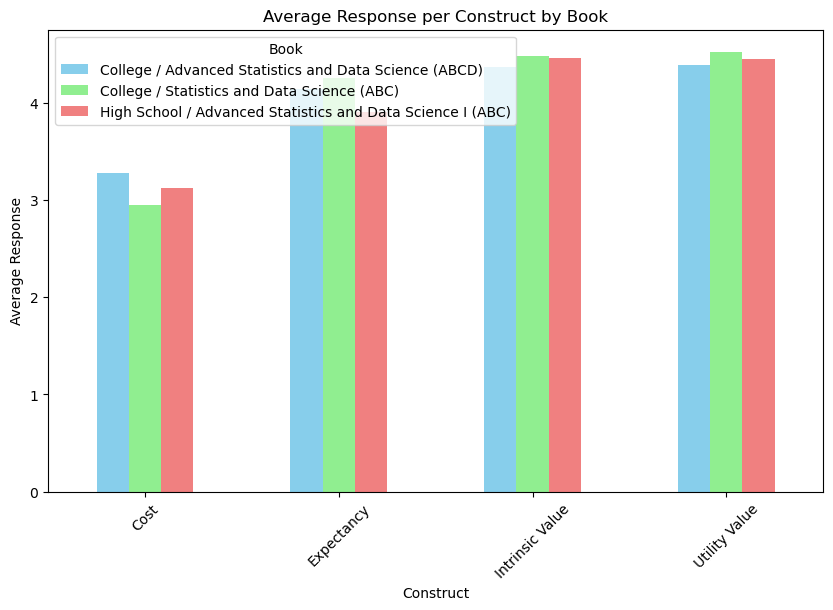

In [26]:
# Calculate the average response per construct and book
avg_response = pulse.groupby(['book', 'construct'])['response'].mean().unstack(0)

# Plot
colors = ['skyblue', 'lightgreen', 'lightcoral', 'wheat']  # One color for each book
avg_response.plot(kind='bar', color=colors, figsize=(10, 6))

plt.xlabel('Construct')
plt.ylabel('Average Response')
plt.title('Average Response per Construct by Book')
plt.xticks(rotation=45)
plt.legend(title='Book')

plt.show()

In [34]:
eoc = pd.read_csv('checkpoints_eoc_sample.csv')
eoc

,student_id,class_id,chapter_number,book,EOC,n_possible,n_correct,n_attempt
0,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,1,College / Statistics and Data Science (ABC),0.921053,38,35,40
1,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,2,College / Statistics and Data Science (ABC),0.839080,87,73,127
2,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,3,College / Statistics and Data Science (ABC),0.769231,104,80,145
3,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,4,College / Statistics and Data Science (ABC),0.743590,118,87,217
4,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,5,College / Statistics and Data Science (ABC),0.777778,63,49,90
...,...,...,...,...,...,...,...,...
2537,fef083e8-7167-4f42-82d5-d2e893aa408a,2294d558-6f5d-41c5-8d28-7b5280970f95,7,College / Statistics and Data Science (ABC),0.746269,67,50,81
2538,fef083e8-7167-4f42-82d5-d2e893aa408a,2294d558-6f5d-41c5-8d28-7b5280970f95,8,College / Statistics and Data Science (ABC),0.730337,89,65,150
2539,fef083e8-7167-4f42-82d5-d2e893aa408a,2294d558-6f5d-41c5-8d28-7b5280970f95,9,College / Statistics and Data Science (ABC),0.675214,117,79,196
2540,fef083e8-7167-4f42-82d5-d2e893aa408a,2294d558-6f5d-41c5-8d28-7b5280970f95,10,College / Statistics and Data Science (ABC),0.363636,44,16,112


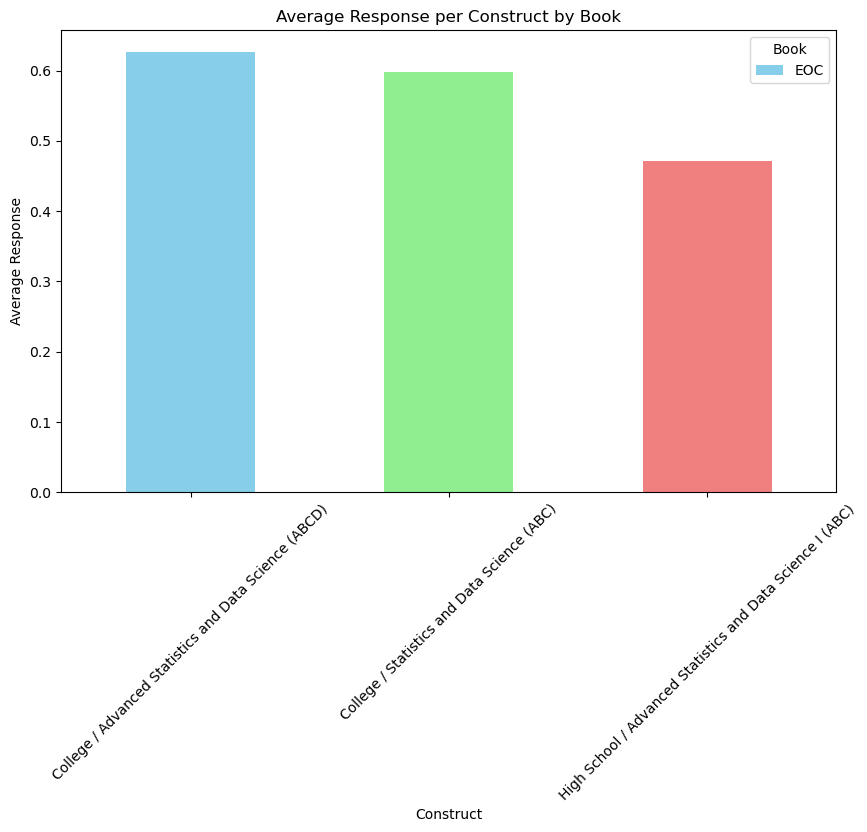

In [36]:
# Calculate the average response per construct and book
avg_eoc = eoc.groupby(['book'])['EOC'].mean()

# Plot
colors = ['skyblue', 'lightgreen', 'lightcoral', 'wheat']  # One color for each book
avg_eoc.plot(kind='bar', color=colors, figsize=(10, 6))

plt.xlabel('Construct')
plt.ylabel('Average Response')
plt.title('Average Response per Construct by Book')
plt.xticks(rotation=45)
plt.legend(title='Book')

plt.show()

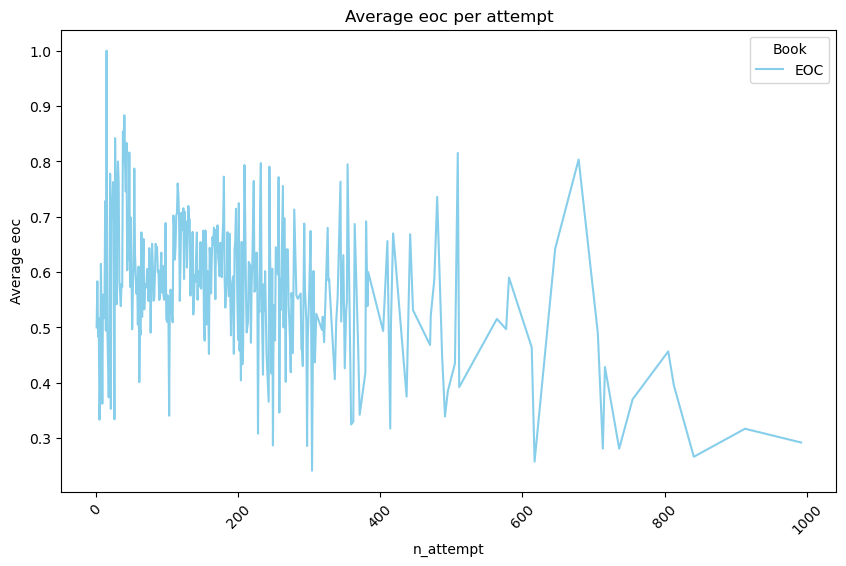

In [49]:
# Calculate the average response per construct and book
attempt = eoc[eoc['n_attempt'] < 1000]
attempt = attempt.groupby(['n_attempt'])['EOC'].mean()
# Plot
colors = ['skyblue', 'lightgreen', 'lightcoral', 'wheat']  # One color for each book
attempt.plot(kind='line', color=colors, figsize=(10, 6))
plt.xlabel('n_attempt')
plt.ylabel('Average eoc')
plt.title('Average eoc per attempt')
plt.xticks(rotation=45)
plt.legend(title='Book')

plt.show()

In [7]:
responses = pd.read_csv('responses_sample.csv')
responses

C:\Users\yugi9\AppData\Local\Temp\ipykernel_16536\315274089.py:1: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  responses = pd.read_csv('responses_sample.csv')


,book,release,chapter,page,chapter_number,section_number,review_flag,institution_id,class_id,student_id,...,lrn_option_2,lrn_option_3,lrn_option_4,lrn_option_5,lrn_option_6,lrn_option_7,lrn_option_8,lrn_option_9,lrn_option_10,lrn_option_11
0,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,0780b2c5-b260-4a31-816e-e91ce8b403a0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,ceacd30b-36ff-413e-9d7d-c389ad5086cf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,ba593149-8b3c-4e1e-8df9-2b470c49a4f4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,1bacdb33-5165-44c1-9aa5-b6a904e6c463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,646acd2f-5a8b-4629-b753-faff3ff49b8c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246273,High School / Advanced Statistics and Data Sci...,v5.0,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,False,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,358dde6e-b5ae-4fa4-898e-05cfff311129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246274,High School / Advanced Statistics and Data Sci...,v5.0,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,False,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,358dde6e-b5ae-4fa4-898e-05cfff311129,...,Some High School,High School Graduate,Post High School Vocational Training,Some College,Associate's Degree,Bachelor's Degree,"Post Graduate Degree (Master's, Doctorate, etc.)",NaN,NaN,NaN
246275,High School / Advanced Statistics and Data Sci...,v5.0,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,False,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,358dde6e-b5ae-4fa4-898e-05cfff311129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246276,High School / Advanced Statistics and Data Sci...,v5.0,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,False,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,358dde6e-b5ae-4fa4-898e-05cfff311129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
eoc_avg = eoc.filter(items=['chapter_number', 'EOC', 'book', 'student_id'])
eoc_avg

NameError: name 'eoc' is not defined

In [9]:
# Group by both chapter_number and book, then calculate the mean EOC value for each group
eoc_avg_grouped = eoc_avg.groupby(['chapter_number', 'book'])['EOC'].mean().reset_index()

# Display the result
eoc_avg_grouped

NameError: name 'eoc_avg' is not defined

In [10]:
review = responses[responses['review_flag']==True]
review = review.filter(items=['book', 'chapter_number', 'student_id', 'lrn_type', 'item_type', 'points_earned', 'points_possible'])
# responses[responses['lrn_type'].isna()]
review

,book,chapter_number,student_id,lrn_type,item_type,points_earned,points_possible
994,College / Advanced Statistics and Data Science...,1.0,0a8f8e66-5a3b-45c6-941b-ea77d27fd63f,mcq,learnosity,1.0,1.0
995,College / Advanced Statistics and Data Science...,1.0,ed4e4f76-c1a3-4887-ad22-0ab932bbdf15,mcq,learnosity,1.0,1.0
996,College / Advanced Statistics and Data Science...,1.0,1199445a-8ff0-4b86-bb37-a1e1420e32e9,mcq,learnosity,1.0,1.0
997,College / Advanced Statistics and Data Science...,1.0,1bacdb33-5165-44c1-9aa5-b6a904e6c463,mcq,learnosity,1.0,1.0
998,College / Advanced Statistics and Data Science...,1.0,646acd2f-5a8b-4629-b753-faff3ff49b8c,mcq,learnosity,1.0,1.0
...,...,...,...,...,...,...,...
244597,High School / Advanced Statistics and Data Sci...,6.0,358dde6e-b5ae-4fa4-898e-05cfff311129,mcq,learnosity,0.0,1.0
244598,High School / Advanced Statistics and Data Sci...,6.0,358dde6e-b5ae-4fa4-898e-05cfff311129,mcq,learnosity,0.0,1.0
244599,High School / Advanced Statistics and Data Sci...,6.0,358dde6e-b5ae-4fa4-898e-05cfff311129,mcq,learnosity,0.0,1.0
244600,High School / Advanced Statistics and Data Sci...,6.0,358dde6e-b5ae-4fa4-898e-05cfff311129,mcq,learnosity,0.0,1.0


In [11]:
aggregates = review.groupby(['chapter_number', 'student_id']).agg(
    points_earned_total=('points_earned', 'sum'),
    points_possible_total=('points_possible', 'sum')
).reset_index()

# Step 2: Calculate 'grade'
aggregates['grade'] = aggregates['points_earned_total'] / aggregates['points_possible_total']

# Display the first few rows of the result
aggregates

,chapter_number,student_id,points_earned_total,points_possible_total,grade
0,1.0,001824fb-a2fd-431d-aef6-7a1250d97a62,11.0,13.0,0.846154
1,1.0,041a771b-41cc-4b36-928d-ec321f918db5,9.0,13.0,0.692308
2,1.0,04347fe5-e55a-4adc-86f2-a156ddfcfc13,13.0,13.0,1.000000
3,1.0,045d0e87-585c-4126-a2c0-c744effb11b2,11.0,13.0,0.846154
4,1.0,05588964-8577-4b9f-9a5e-ddb770184d3c,11.0,13.0,0.846154
...,...,...,...,...,...
1594,9.0,fc8583cc-315d-4240-a516-ab7e4640ccaa,16.0,29.0,0.551724
1595,9.0,fcdfb64b-0dd7-4839-a76d-1bd3d688d5c0,23.0,29.0,0.793103
1596,9.0,fd2a1c41-0bc1-47c6-8ab3-d238a9a648ef,21.0,29.0,0.724138
1597,9.0,fdc4706b-6963-41e4-9a96-ce7b44b2dc46,13.0,29.0,0.448276


In [12]:
formative = responses.filter(items=['chapter_number', 'student_id', 'lrn_type', 'item_type', 'review_flag'])
grade_types = aggregates.merge(formative, on=['chapter_number', 'student_id'], how='inner')
grade_types = grade_types[grade_types['review_flag']==False]
grade_types.filter(items=['chapter_number', 'student_id', 'grade', 'lrn_type', 'item_type'])
grade_types.fillna('code', inplace=True)
grade_types[grade_types['lrn_type']!='code']
# grade_types

,chapter_number,student_id,points_earned_total,points_possible_total,grade,lrn_type,item_type,review_flag
25,1.0,001824fb-a2fd-431d-aef6-7a1250d97a62,11.0,13.0,0.846154,plaintext,learnosity,False
43,1.0,041a771b-41cc-4b36-928d-ec321f918db5,9.0,13.0,0.692308,choicematrix,learnosity,False
105,1.0,04347fe5-e55a-4adc-86f2-a156ddfcfc13,13.0,13.0,1.000000,choicematrix,learnosity,False
129,1.0,04347fe5-e55a-4adc-86f2-a156ddfcfc13,13.0,13.0,1.000000,plaintext,learnosity,False
181,1.0,045d0e87-585c-4126-a2c0-c744effb11b2,11.0,13.0,0.846154,plaintext,learnosity,False
...,...,...,...,...,...,...,...,...
172208,9.0,fef083e8-7167-4f42-82d5-d2e893aa408a,19.0,29.0,0.655172,mcq,learnosity,False
172209,9.0,fef083e8-7167-4f42-82d5-d2e893aa408a,19.0,29.0,0.655172,mcq,learnosity,False
172210,9.0,fef083e8-7167-4f42-82d5-d2e893aa408a,19.0,29.0,0.655172,plaintext,learnosity,False
172211,9.0,fef083e8-7167-4f42-82d5-d2e893aa408a,19.0,29.0,0.655172,plaintext,learnosity,False


In [227]:
# Assuming 'df' is the original DataFrame

# Calculate counts for each lrn_type per chapter/student combination
counts = grade_types.groupby(['chapter_number', 'student_id', 'lrn_type']).size().reset_index(name='count')

# Calculate total counts per chapter/student combination
total_counts = grade_types.groupby(['chapter_number', 'student_id']).size().reset_index(name='total')

# Merge counts with total_counts to calculate percentages
merged = pd.merge(counts, total_counts, on=['chapter_number', 'student_id'])
merged['percentage'] = (merged['count'] / merged['total']) * 100

# Pivot to get lrn_type percentages as columns
pivot_table = merged.pivot_table(index=['chapter_number', 'student_id'], columns='lrn_type', values='percentage', fill_value=0).reset_index()

# Extract unique grades for each chapter/student pair
grades = grade_types[['chapter_number', 'student_id', 'grade']].drop_duplicates()

# Merge the pivot_table with grades
final_df = pd.merge(pivot_table, grades, on=['chapter_number', 'student_id'])

# Display the first few rows of the final DataFrame
final_df


,chapter_number,student_id,association,choicematrix,clozeassociation,code,formulaV2,imageclozeassociation,mcq,plaintext,shorttext,sortlist,grade
0,1.0,001824fb-a2fd-431d-aef6-7a1250d97a62,0.000000,0.000000,0.0,96.153846,0.0,0.0,0.000000,3.846154,0.0,0.0,0.846154
1,1.0,041a771b-41cc-4b36-928d-ec321f918db5,0.000000,2.083333,0.0,97.916667,0.0,0.0,0.000000,0.000000,0.0,0.0,0.692308
2,1.0,04347fe5-e55a-4adc-86f2-a156ddfcfc13,0.000000,3.448276,0.0,93.103448,0.0,0.0,0.000000,3.448276,0.0,0.0,1.000000
3,1.0,045d0e87-585c-4126-a2c0-c744effb11b2,0.000000,0.000000,0.0,97.368421,0.0,0.0,0.000000,2.631579,0.0,0.0,0.846154
4,1.0,05588964-8577-4b9f-9a5e-ddb770184d3c,0.000000,3.571429,0.0,92.857143,0.0,0.0,0.000000,3.571429,0.0,0.0,0.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,9.0,fc8583cc-315d-4240-a516-ab7e4640ccaa,5.319149,7.446809,0.0,19.148936,0.0,0.0,54.255319,13.829787,0.0,0.0,0.551724
1582,9.0,fcdfb64b-0dd7-4839-a76d-1bd3d688d5c0,5.681818,5.681818,0.0,17.045455,0.0,0.0,57.954545,13.636364,0.0,0.0,0.793103
1583,9.0,fd2a1c41-0bc1-47c6-8ab3-d238a9a648ef,4.807692,4.807692,0.0,28.846154,0.0,0.0,49.038462,12.500000,0.0,0.0,0.724138
1584,9.0,fdc4706b-6963-41e4-9a96-ce7b44b2dc46,5.952381,4.761905,0.0,15.476190,0.0,0.0,59.523810,14.285714,0.0,0.0,0.448276


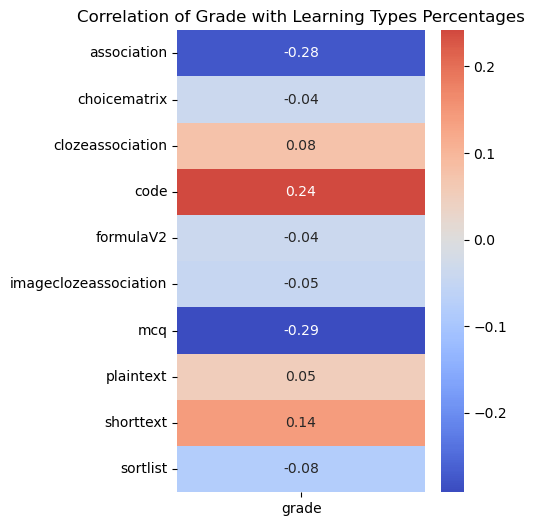

In [236]:
# Assuming final_df is the DataFrame you've prepared in the previous step

new_df = final_df.copy()
new_df = new_df.drop(columns=['student_id', 'chapter_number'])
new_df
# Compute the correlation matrix
correlation_matrix = new_df.corr()

# Isolate the 'grade' correlations
grade_correlations = correlation_matrix.loc[:, ['grade']].drop('grade', axis=0)

# Plot the heatmap for 'grade' correlations only
plt.figure(figsize=(4, 6))  # Adjust the figure size as needed
sns.heatmap(grade_correlations, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            cbar_kws={"orientation": "vertical"})
plt.title('Correlation of Grade with Learning Types Percentages')
plt.show()

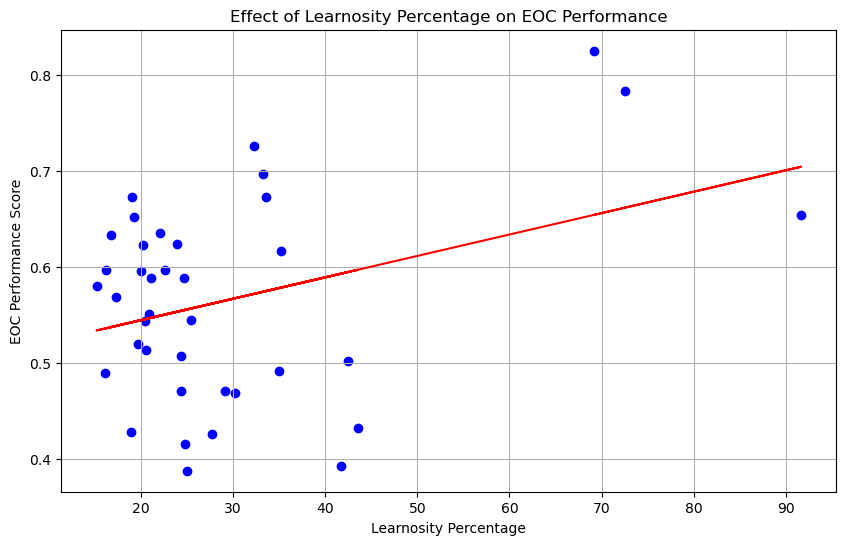

In [110]:
x = pivot_table_percent['code']
y = pivot_table_percent['EOC']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')  # Plot as scatter plot
plt.title('Effect of Learnosity Percentage on EOC Performance')
plt.xlabel('Learnosity Percentage')
plt.ylabel('EOC Performance Score')
plt.grid(True)

# Optionally, fit a linear regression line to visualize the trend
# This step requires numpy
m, b = np.polyfit(x, y, 1)  # Fit a 1st degree polynomial (line) to the data
plt.plot(x, m*x + b, color='red')  # Plot the fitted line

plt.show()

In [13]:
page_views = pd.read_csv('page_views_sample.csv')
responses = pd.read_csv('responses_sample.csv')
checkpoints_eoc = pd.read_csv('checkpoints_eoc_sample.csv')

C:\Users\yugi9\AppData\Local\Temp\ipykernel_16536\1949624027.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_views = pd.read_csv('page_views_sample.csv')
C:\Users\yugi9\AppData\Local\Temp\ipykernel_16536\1949624027.py:2: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  responses = pd.read_csv('responses_sample.csv')


In [14]:
df_merged = pd.merge(
    page_views[['student_id', 'chapter_number', 'dt_accessed', 'engaged']],
    formative[['student_id', 'lrn_type']],
    on='student_id',
    how='inner'
)

# Step 2: If checkpoints_eoc contains unique EOC scores per student per chapter, merge it as well
df_merged = pd.merge(
    df_merged,
    checkpoints_eoc[['student_id', 'chapter_number', 'EOC']],
    on=['student_id', 'chapter_number'],
    how='inner',
    suffixes=('', '_eoc')
)
# df_merged['lrn_type'].fillna('code', inplace=True)
# df_merged[grade_types['lrn_type']=='code']
df_merged

,student_id,chapter_number,dt_accessed,engaged,lrn_type,EOC
0,953768c5-32fa-4190-8fee-1da82d8710bc,1.0,2023-01-06T00:47:06Z,10857.0,NaN,0.542373
1,953768c5-32fa-4190-8fee-1da82d8710bc,1.0,2023-01-06T00:47:06Z,10857.0,NaN,0.542373
2,953768c5-32fa-4190-8fee-1da82d8710bc,1.0,2023-01-06T00:47:06Z,10857.0,NaN,0.542373
3,953768c5-32fa-4190-8fee-1da82d8710bc,1.0,2023-01-06T00:47:06Z,10857.0,NaN,0.542373
4,953768c5-32fa-4190-8fee-1da82d8710bc,1.0,2023-01-06T00:47:06Z,10857.0,NaN,0.542373
...,...,...,...,...,...,...
87843348,358dde6e-b5ae-4fa4-898e-05cfff311129,8.0,2023-05-10T21:45:42Z,102395.0,choicematrix,NaN
87843349,358dde6e-b5ae-4fa4-898e-05cfff311129,8.0,2023-05-10T21:45:42Z,102395.0,mcq,NaN
87843350,358dde6e-b5ae-4fa4-898e-05cfff311129,8.0,2023-05-10T21:45:42Z,102395.0,shorttext,NaN
87843351,358dde6e-b5ae-4fa4-898e-05cfff311129,8.0,2023-05-10T21:45:42Z,102395.0,mcq,NaN


In [17]:
# df_merged['lrn_type'].fillna('code', inplace=True)
df_merged[df_merged['lrn_type']!='code']

,student_id,chapter_number,dt_accessed,engaged,lrn_type,EOC
46,953768c5-32fa-4190-8fee-1da82d8710bc,1.0,2023-01-06T00:47:06Z,10857.0,plaintext,0.542373
47,953768c5-32fa-4190-8fee-1da82d8710bc,1.0,2023-01-06T00:47:06Z,10857.0,mcq,0.542373
48,953768c5-32fa-4190-8fee-1da82d8710bc,1.0,2023-01-06T00:47:06Z,10857.0,mcq,0.542373
49,953768c5-32fa-4190-8fee-1da82d8710bc,1.0,2023-01-06T00:47:06Z,10857.0,mcq,0.542373
50,953768c5-32fa-4190-8fee-1da82d8710bc,1.0,2023-01-06T00:47:06Z,10857.0,mcq,0.542373
...,...,...,...,...,...,...
87843348,358dde6e-b5ae-4fa4-898e-05cfff311129,8.0,2023-05-10T21:45:42Z,102395.0,choicematrix,NaN
87843349,358dde6e-b5ae-4fa4-898e-05cfff311129,8.0,2023-05-10T21:45:42Z,102395.0,mcq,NaN
87843350,358dde6e-b5ae-4fa4-898e-05cfff311129,8.0,2023-05-10T21:45:42Z,102395.0,shorttext,NaN
87843351,358dde6e-b5ae-4fa4-898e-05cfff311129,8.0,2023-05-10T21:45:42Z,102395.0,mcq,NaN


In [18]:
# Aggregating engagement metrics
df_engagement_metrics = df_merged.groupby(['student_id', 'chapter_number', 'lrn_type']).agg(
    total_engaged_minutes=('engaged', 'sum'),
    activity_frequency=('dt_accessed', 'count')
).reset_index()
df_engagement_metrics

,student_id,chapter_number,lrn_type,total_engaged_minutes,activity_frequency
0,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,association,1.585732e+08,812
1,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,choicematrix,2.548498e+08,1305
2,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,clozeassociation,2.831665e+07,145
3,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,code,1.483792e+09,7598
4,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,formulaV2,5.663330e+06,29
...,...,...,...,...,...
24434,fef083e8-7167-4f42-82d5-d2e893aa408a,11.0,code,7.139695e+08,1968
24435,fef083e8-7167-4f42-82d5-d2e893aa408a,11.0,formulaV2,5.804630e+06,16
24436,fef083e8-7167-4f42-82d5-d2e893aa408a,11.0,mcq,1.474376e+09,4064
24437,fef083e8-7167-4f42-82d5-d2e893aa408a,11.0,plaintext,1.335065e+08,368


In [78]:
# Pivot the DataFrame to have lrn_type values as new column names
# For total_engaged_minutes
pivot_TEM = df_engagement_metrics.pivot_table(index=['student_id', 'chapter_number'], 
                           columns='lrn_type', 
                           values='total_engaged_minutes', 
                           aggfunc='sum', 
                           fill_value=0)

# For activity_frequency
pivot_AF = df_engagement_metrics.pivot_table(index=['student_id', 'chapter_number'], 
                          columns='lrn_type', 
                          values='activity_frequency', 
                          aggfunc='sum', 
                          fill_value=0)

# Rename columns to include -TEM and -AF suffixes
pivot_TEM.columns = [f'{col}-TEM' for col in pivot_TEM.columns]
pivot_AF.columns = [f'{col}-AF' for col in pivot_AF.columns]

# Merge the two pivoted DataFrames
pivot_final = pd.merge(pivot_TEM.reset_index(), pivot_AF.reset_index(), on=['student_id', 'chapter_number'])

pivot_final = pd.merge(pivot_final, grade_types[['chapter_number', 'student_id', 'grade']], 
                     on=['chapter_number', 'student_id'], 
                     how='left')
pivot_final = pivot_final.dropna()
pivot_final

,student_id,chapter_number,association-TEM,choicematrix-TEM,clozeassociation-TEM,code-TEM,formulaV2-TEM,imageclozeassociation-TEM,mcq-TEM,plaintext-TEM,...,choicematrix-AF,clozeassociation-AF,code-AF,formulaV2-AF,imageclozeassociation-AF,mcq-AF,plaintext-AF,shorttext-AF,sortlist-AF,grade
0,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,158573240.0,254849850.0,28316650.0,1.483792e+09,5663330.0,11326660.0,3.992648e+09,962766100.0,...,1305,145,7598,29,58,20445,4930,1015,29,0.846154
1,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,158573240.0,254849850.0,28316650.0,1.483792e+09,5663330.0,11326660.0,3.992648e+09,962766100.0,...,1305,145,7598,29,58,20445,4930,1015,29,0.846154
2,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,158573240.0,254849850.0,28316650.0,1.483792e+09,5663330.0,11326660.0,3.992648e+09,962766100.0,...,1305,145,7598,29,58,20445,4930,1015,29,0.846154
3,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,158573240.0,254849850.0,28316650.0,1.483792e+09,5663330.0,11326660.0,3.992648e+09,962766100.0,...,1305,145,7598,29,58,20445,4930,1015,29,0.846154
4,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,158573240.0,254849850.0,28316650.0,1.483792e+09,5663330.0,11326660.0,3.992648e+09,962766100.0,...,1305,145,7598,29,58,20445,4930,1015,29,0.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131186,fef083e8-7167-4f42-82d5-d2e893aa408a,9.0,213723375.0,113985800.0,0.0,1.752532e+09,14248225.0,0.0,3.619049e+09,327709175.0,...,240,0,3690,30,0,7620,690,90,0,0.655172
131187,fef083e8-7167-4f42-82d5-d2e893aa408a,9.0,213723375.0,113985800.0,0.0,1.752532e+09,14248225.0,0.0,3.619049e+09,327709175.0,...,240,0,3690,30,0,7620,690,90,0,0.655172
131188,fef083e8-7167-4f42-82d5-d2e893aa408a,9.0,213723375.0,113985800.0,0.0,1.752532e+09,14248225.0,0.0,3.619049e+09,327709175.0,...,240,0,3690,30,0,7620,690,90,0,0.655172
131189,fef083e8-7167-4f42-82d5-d2e893aa408a,9.0,213723375.0,113985800.0,0.0,1.752532e+09,14248225.0,0.0,3.619049e+09,327709175.0,...,240,0,3690,30,0,7620,690,90,0,0.655172


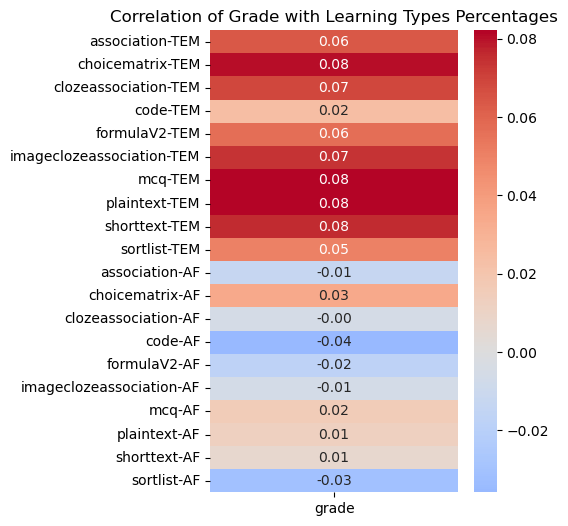

In [21]:
import seaborn as sns

new_df = pivot_final.copy()
new_df = new_df.drop(columns=['student_id', 'chapter_number'])
new_df
# Compute the correlation matrix
correlation_matrix = new_df.corr()

# Isolate the 'grade' correlations
grade_correlations = correlation_matrix.loc[:, ['grade']].drop('grade', axis=0)

# Plot the heatmap for 'grade' correlations only
plt.figure(figsize=(4, 6))  # Adjust the figure size as needed
sns.heatmap(grade_correlations, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            cbar_kws={"orientation": "vertical"})
plt.title('Correlation of Grade with Learning Types Percentages')
plt.show()

In [22]:
from scipy.stats import pearsonr


In [23]:
# Let's assume merged_df is your final DataFrame that contains all the relevant columns
import pandas as pd
from scipy.stats import pearsonr

# Initialize a list to store significance test results
significance_tests = []

# Iterate over the columns to perform Pearson correlation tests
for col in pivot_final.columns:
    if col.endswith('-TEM') or col.endswith('-AF'):  # Only consider engagement columns
        # Compute the Pearson correlation coefficient and p-value
        corr_coef, p_value = pearsonr(pivot_final[col], pivot_final['grade'])
        # Append the results along with the column name to our list
        significance_tests.append((col, corr_coef, p_value))

# Convert the list to a DataFrame for easier viewing
significance_df = pd.DataFrame(significance_tests, columns=['Engagement Type', 'Correlation Coefficient', 'P-Value'])

# Display the results
print(significance_df)


              Engagement Type  Correlation Coefficient        P-Value
0             association-TEM                 0.063754  2.222781e-117
1            choicematrix-TEM                 0.079863  2.990118e-183
2        clozeassociation-TEM                 0.068429  5.781312e-135
3                    code-TEM                 0.024098   3.372087e-18
4               formulaV2-TEM                 0.056770   1.953928e-93
5   imageclozeassociation-TEM                 0.073717  2.310635e-156
6                     mcq-TEM                 0.082157  7.621248e-194
7               plaintext-TEM                 0.081800  3.557130e-192
8               shorttext-TEM                 0.076042  2.790062e-166
9                sortlist-TEM                 0.050557   1.806266e-74
10             association-AF                -0.012934   3.042010e-06
11            choicematrix-AF                 0.034609   8.040886e-36
12        clozeassociation-AF                -0.004997   7.132881e-02
13                  

In [24]:
# Apply a common threshold for significance
significance_level = 0.05
significant_results = significance_df[significance_df['P-Value'] < significance_level]

# Display significant results
print("Significant Correlations with Grade:")
print(significant_results)


Significant Correlations with Grade:
              Engagement Type  Correlation Coefficient        P-Value
0             association-TEM                 0.063754  2.222781e-117
1            choicematrix-TEM                 0.079863  2.990118e-183
2        clozeassociation-TEM                 0.068429  5.781312e-135
3                    code-TEM                 0.024098   3.372087e-18
4               formulaV2-TEM                 0.056770   1.953928e-93
5   imageclozeassociation-TEM                 0.073717  2.310635e-156
6                     mcq-TEM                 0.082157  7.621248e-194
7               plaintext-TEM                 0.081800  3.557130e-192
8               shorttext-TEM                 0.076042  2.790062e-166
9                sortlist-TEM                 0.050557   1.806266e-74
10             association-AF                -0.012934   3.042010e-06
11            choicematrix-AF                 0.034609   8.040886e-36
13                    code-AF                -0.03580

In [79]:
# Assuming df_final is your full DataFrame before dropping 'student_id'
student_ids = pivot_final['student_id']

# Now drop 'student_id' from df_final before creating X and y
X = pivot_final.drop(['student_id', 'grade', 'chapter_number'], axis=1)
y = pivot_final['grade']

In [80]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [81]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [82]:
# Fit the model on the training data
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [83]:
from sklearn.metrics import mean_squared_error

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.4914517295294507e-07


In [84]:
# Get feature importances from the model
feature_importances = rf.feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Display the feature importances sorted by most important
print(feature_importance_df.sort_values(by='Importance', ascending=False))


                      Feature  Importance
6                     mcq-TEM    0.108694
13                    code-AF    0.108457
3                    code-TEM    0.098115
1            choicematrix-TEM    0.096710
11            choicematrix-AF    0.072945
7               plaintext-TEM    0.054785
8               shorttext-TEM    0.047867
17               plaintext-AF    0.047086
18               shorttext-AF    0.046950
16                     mcq-AF    0.040478
9                sortlist-TEM    0.038968
2        clozeassociation-TEM    0.038013
0             association-TEM    0.034027
5   imageclozeassociation-TEM    0.030829
12        clozeassociation-AF    0.028523
4               formulaV2-TEM    0.027898
10             association-AF    0.023945
15   imageclozeassociation-AF    0.021738
19                sortlist-AF    0.018194
14               formulaV2-AF    0.015778


In [85]:
# Use the trained model to predict the test set
y_pred_test = rf.predict(X_test)


In [86]:
# Calculate residuals
residuals = y_test - y_pred_test

In [87]:
# Since y_test is a Series, use its index to pull the student_id from the original DataFrame
test_student_ids = pivot_final.loc[y_test.index, 'student_id']

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'student_id': test_student_ids,
    'actual_grade': y_test,
    'predicted_grade': y_pred_test,
    'residual': residuals
})
plot_df.reset_index(drop=True, inplace=True)


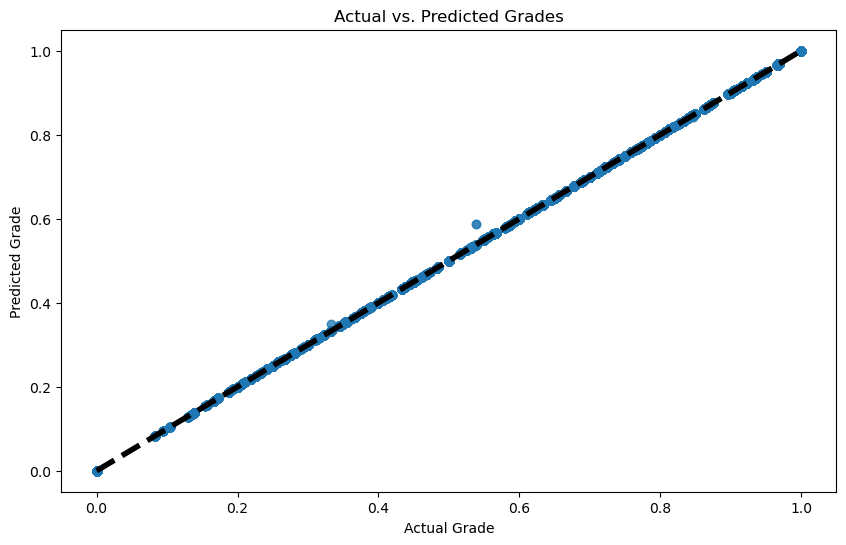

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(plot_df['actual_grade'], plot_df['predicted_grade'], alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Line for perfect predictions
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.title('Actual vs. Predicted Grades')
plt.show()


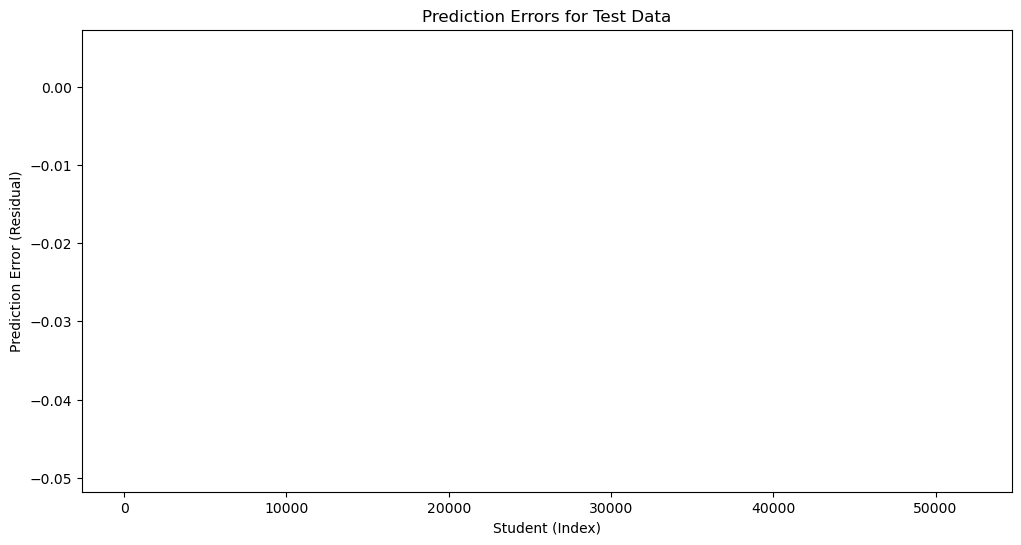

In [89]:
plt.figure(figsize=(12, 6))
plt.bar(plot_df.index, plot_df['residual'])
plt.xlabel('Student (Index)')
plt.ylabel('Prediction Error (Residual)')
plt.title('Prediction Errors for Test Data')
plt.show()


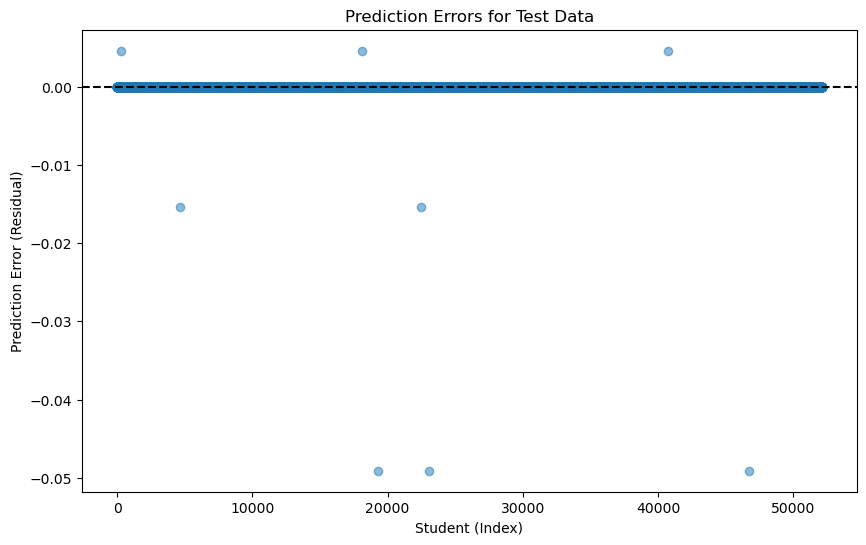

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(plot_df.index, plot_df['residual'], alpha=0.5)
plt.axhline(0, color='k', linestyle='--')  # Line at 0 to show no error
plt.xlabel('Student (Index)')
plt.ylabel('Prediction Error (Residual)')
plt.title('Prediction Errors for Test Data')
plt.show()


In [96]:
import math
plot_df[abs(plot_df['actual_grade'] - plot_df['predicted_grade']) > .001]

,student_id,actual_grade,predicted_grade,residual
287,c308c6a7-533b-4c43-a048-26305a48aebf,0.846154,0.841538,0.004615
4613,7740fbdb-164c-44cd-abac-04a45f49c628,0.333333,0.348718,-0.015385
18129,c308c6a7-533b-4c43-a048-26305a48aebf,0.846154,0.841538,0.004615
19324,a75c4d5d-1e93-4e17-b485-841464261b98,0.538462,0.587564,-0.049103
22485,7740fbdb-164c-44cd-abac-04a45f49c628,0.333333,0.348718,-0.015385
23055,a75c4d5d-1e93-4e17-b485-841464261b98,0.538462,0.587564,-0.049103
40718,c308c6a7-533b-4c43-a048-26305a48aebf,0.846154,0.841538,0.004615
46734,a75c4d5d-1e93-4e17-b485-841464261b98,0.538462,0.587564,-0.049103


In [97]:
plot_df

,student_id,actual_grade,predicted_grade,residual
0,a7c8635d-ceb3-4dc2-a1f8-938fdeeac2ff,0.218750,0.218750,0.000000e+00
1,13c81022-6492-4e54-b7a0-68a399bc6433,0.766667,0.766667,6.661338e-16
2,9bc5dcd2-8f6b-4d70-918e-ad5d0f795ce6,0.400000,0.400000,7.771561e-16
3,fdc4706b-6963-41e4-9a96-ce7b44b2dc46,0.500000,0.500000,0.000000e+00
4,c7ebd263-85a4-48e7-83f5-80a12bd309f0,0.806452,0.806452,-3.330669e-16
...,...,...,...,...
52095,f03fcac7-b005-4ba0-952e-b8616cbaa093,0.800000,0.800000,1.443290e-15
52096,c0a54432-3243-455e-8daa-7d59680ef098,0.531250,0.531250,0.000000e+00
52097,cce1092c-18e7-4698-8494-7e7a6ae5c695,0.413793,0.413793,-1.054712e-15
52098,c0a54432-3243-455e-8daa-7d59680ef098,0.750000,0.750000,0.000000e+00
